<a href="https://colab.research.google.com/github/AbrahamW11/WST-802/blob/main/Running_R_in_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install.packages("reticulate", dependencies = TRUE)
install.packages("keras", dependencies = TRUE)
library(keras)

#library(reticulate)
#reticulate::install_miniconda()

install_keras(method=c("conda"), version="2.5")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# use_condaenv("renv3.7")
# conda_install("renv3.7", "scipy")
# conda_install("renv3.7", "numpy")
# scipy <- import("scipy")
# np <- import("numpy")

+ '/root/.local/share/r-miniconda/bin/conda' 'install' '--yes' '--name' 'renv3.7' '-c' 'conda-forge' 'scipy'

+ '/root/.local/share/r-miniconda/bin/conda' 'install' '--yes' '--name' 'renv3.7' '-c' 'conda-forge' 'numpy'



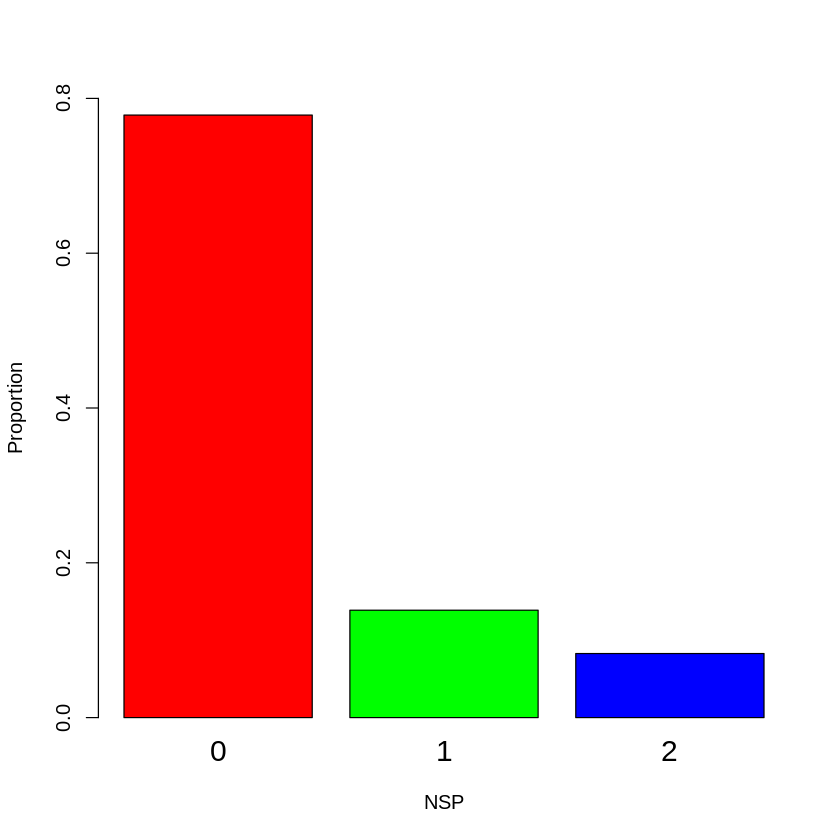

In [ ]:
data <- read.csv("/content/sample_data/Cardiotocographic.csv", header= TRUE)
data$NSP <- data$NSP -1

In [ ]:
# Matrix
data <- as.matrix(data)
dimnames(data) <- NULL  

# Normalize 
data[,1:21] <- normalize(data[,1:21])

# Partition
set.seed(1234)
ind <- sample(2, nrow(data), replace = T, prob=c(.7, .3))
training <- data[ind==1, 1:21]
test <- data[ind==2, 1:21]
trainingtarget <- data[ind==1, 22]
testtarget <- data[ind==2, 22]

# One hot encoding the labels
trainLabels <- to_categorical(trainingtarget)
testLabels <- to_categorical(testtarget)

# Creat sequential model and add layers 
model <- keras_model_sequential()
model %>%  layer_dense(units = 8, activation = 'relu', input_shape = c(21)) %>%   
  layer_dense(units = 3, activation = 'softmax') 
summary(model)

Loaded Tensorflow version 2.5.3



Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_1 (Dense)                     (None, 8)                       176         
________________________________________________________________________________
dense (Dense)                       (None, 3)                       27          
Total params: 203
Trainable params: 203
Non-trainable params: 0
________________________________________________________________________________


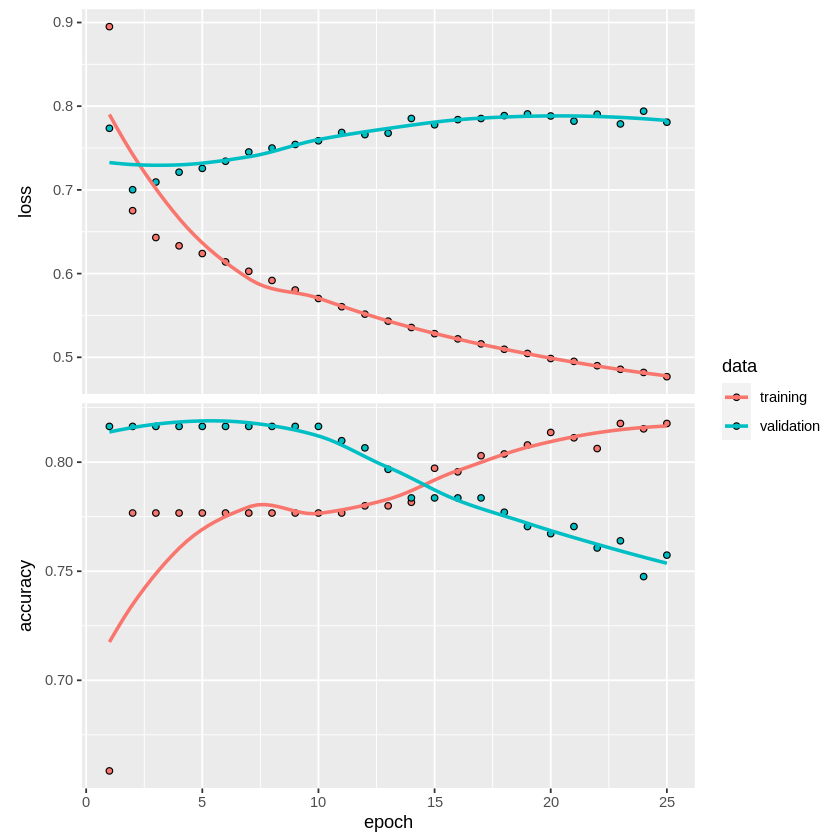

In [ ]:
# Compile 
model %>% compile(loss = 'categorical_crossentropy', 
  optimizer = 'adam',
  metrics = 'accuracy')

# Fit 
fit <- model %>%   
  fit(training, 
  trainLabels, 
  epochs = 25,
  batch_size = 8, 
  validation_split = 0.2)
  plot(fit)

In [ ]:
# Evaluate 
model %>%  evaluate(test, testLabels)  

# Prediction 
pred <- model %>% 
  predict_classes(test)
table(Predicted=pred, Actual=testtarget)

loss  accuracy 
0.5548891 0.7927032

Warning message in predict_classes(., test):
“`predict_classes()` is deprecated and and was removed from tensorflow in version 2.6.
Please update your code:
  * If your model does multi-class classification:
    (e.g. if it uses a `softmax` last-layer activation).

      model %>% predict(x) %>% k_argmax()

  * if your model does binary classification
    (e.g. if it uses a `sigmoid` last-layer activation).

      model %>% predict(x) %>% `>`(0.5) %>% k_cast("int32")
”


         Actual
Predicted   0   1   2
        0 445  61  34
        1  15  33  15